In [2]:
from __future__ import division

import glob

import autopep8
import cv2
import numpy as np
import pylint
import scipy.sparse
from matplotlib import pyplot as plt
from scipy.ndimage import imread
from scipy.ndimage.filters import convolve, gaussian_filter
from scipy.sparse import diags

#
#from pyOpticalFlow import getimgfiles

%matplotlib inline

FILTER = 7
QUIVER = 5

In [2]:
## SCRATCH CODE

In [3]:
# from PIL import Image
# w, h = 512, 512
# data = np.zeros((h, w, 3), dtype=np.uint8)
# print(data)
# data[256, 256] = [255, 0, 0]
# img = Image.fromarray(data,)
# img.save('my.png')
# img.show()

In [4]:
# A is a scalar value
def scalar_product(A, B):

    return numpy.multiply(A, B)


def kron_product(A, B):

    for i in range(1, len(A)):

        scalar_product(A[i], B)

    return kron_output_mat


def Diag(S):

    return np.diagonal(S)


def Mat_S(S):

    for i in range(1, m):
        for j in range(1, m):

            for k in range(1, m):

                # returns an array of diagonal elements
                diag_array = list(Diag(S[i][j][k]))
                diag_mat_S[k][j][i] = diag_array

                k += 1

            j += 1

        i += 1

    return diag_mat_S

In [5]:
def plot(img_data):

    #from matplotlib import pyplot as plt
    plt.imshow(img_data, interpolation='nearest')
    plt.show()
    return True

In [6]:
def test_equality(fx,fy,ft):
    if (np.array_equal(fx,fy)) :
        print("fx and fy are same")
        if (np.array_equal(fy,ft)):
            print("All the three derivatives are same")
        
    elif (np.array_equal(fx,ft)):
        print("fx and ft are same")
    elif (np.array_equal(fy,ft)):
        print("fy and ft are same")
    else:
        print("All the three derivatives are different")
        
    
    

## COMPUTING OPTICAL FLOW 
#code taken from HORN-SCHUNK PROGRAM

In [3]:
def computeDoubleDerivatives(single_derivative_x, single_derivative_y, kernelX, kernelY):
    fx = single_derivative_x
    fy = single_derivative_y

    # computing double derivatives for fx and fy:
    #scipy.ndimage.filters.convolve(input, weights, output=None, mode='reflect', cval=0.0, origin=0)

#     input : array_like
#     Input array to filter.

#     weights : array_like
#     Array of weights, same number of dimensions as input


#     print(fx.shape) #(200,200)
#     print(fy.shape) #(200,200)
#     print(kernelX.shape) #(2,2)
#     print(kernelY.shape) #(2,2)

    fxx = convolve(fx, kernelX)

    fyy = convolve(fy, kernelY)

    return fxx, fyy
    # TODO : computing other derivatives.
    # fxy
    # fyx

In [11]:
def william_harvey_lk(im1, im2, alpha, Niter):
    """
    im1: image at t=0
    im2: image at t=1
    alpha: regularization constant
    Niter: number of iteration
    """


#     fx = np.zeros(im1.shape)
#     fy = np.zeros(im1.shape)
#     ft = np.zeros(im1.shape)


#     #not understood!
#     #???
#     fx[1:-1, 1:-1] = (im1[1:-1, 2:] - im1[1:-1, :-2]) / 2
#     fy[1:-1, 1:-1] = (im1[2:, 1:-1] - im1[:-2, 1:-1]) / 2
#     ft[1:-1, 1:-1] = im1[1:-1, 1:-1] - im2[1:-1, 1:-1]
#     #???

    uInitial = np.zeros([im1.shape[0], im1.shape[1]])
    vInitial = np.zeros([im1.shape[0], im1.shape[1]])

    U = uInitial
    V = vInitial

    [fx, fy, fxx, fyy, ft] = computeDerivatives(im1, im2)

#     fg,ax = plt.subplots(1,3,figsize=(18,5))

#     for f,a,t in zip((fx,fy,ft),ax,('$f_x$','$f_y$','$f_t$')):
#         h=a.imshow(f,cmap='bwr')
#         a.set_title(t)
#         fg.colorbar(h,ax=a)

    # Averaging kernel
    kernel = np.array([[1/12, 1/6, 1/12],
                       [1/6,    0, 1/6],
                       [1/12, 1/6, 1/12]], float)

#     print(fx[100,100],fy[100,100],ft[100,100])

    # Iteration to reduce error
    for _ in range(Niter):
        # %% Compute local averages of the flow vectors
        uAvg = convolve(U, kernel)
        vAvg = convolve(V, kernel)
# %% common part of update step
        der = (fx*uAvg + fy*vAvg + ft) / (alpha**2 + fx**2 + fy**2)
# %% iterative step
        U = uAvg - fx * der
        V = vAvg - fy * der

    return U, V

In [9]:
# permutation matrix P:


def P(vec_2d):

    uInitial = np.zeros([im1.shape[0], im1.shape[1]])
    vInitial = np.zeros([im1.shape[0], im1.shape[1]])

    U = uInitial
    V = vInitial

    [fx, fy, fxx, fyy, ft] = computeDerivatives(im1, im2)

    kernel = np.array([[1/12, 1/6, 1/12],
                       [1/6,    0, 1/6],
                       [1/12, 1/6, 1/12]], float)

    for _ in range(Niter):
        # %% Compute local averages of the flow vectors
        uAvg = convolve(U, kernel)
        vAvg = convolve(V, kernel)
# %% common part of update step
        der = (fx*uAvg + fy*vAvg + ft) / (alpha**2 + fx**2 + fy**2)
# %% iterative step
        U = uAvg - fx * der
        V = vAvg - fy * der

    return U, V

In [12]:
def compareGraphs(u, v, Inew, scale=1):
    """
    makes quiver
    """

    ax = plt.figure().gca()
    # print(ax.gca())
    # matplotlib.pyplot.figure --- Create a new figure.
    # matplotlib.pyplot.gca --- Get the current Axes instance on the current figure
#                                 matching the given keyword args, or create one.

    print("ax:", ax)
    print("data_type of variable ax :", type(ax))
    ax.imshow(Inew, cmap='gray')

#     ax: AxesSubplot(0.125,0.125;0.775x0.755)
#     data_type of variable ax : <class 'matplotlib.axes._subplots.AxesSubplot'>

    # plt.scatter(POI[:,0,1],POI[:,0,0])

    #QUIVER = 5
    # range(start,stop,step)

    print("LENGTH OF U and V: ", len(u), len(v))
    # u and v length is 200,200.

    for i in range(0, len(u), QUIVER):
        for j in range(0, len(v), QUIVER):
            ax.arrow(j, i, v[i, j]*scale, u[i, j]*scale, color='red')
            ax.annotate("", xy=(0.5, 0.5), xytext=(0, 0),
                        arrowprops=dict(arrowstyle="->"))

    plt.savefig('mini_cooper.pdf')
    # ax.draw()
    # matplotlib.pyplot.arrow(x, y, dx, dy, **kwargs)
    # Add an arrow to the axes.
    # This draws an arrow from (x, y) to (x+dx, y+dy).

    # plt.arrow(POI[:,0,0],POI[:,0,1],0,-5)

    # plt.draw();
    # plt.savefig('horn_shunck_ouput.png')
    # plt.pause(0.01)

    # ax.savefig('ax_output.png')

In [13]:
def inputting_img():
    #flist,ext = getimgfiles(stem)

    im1_path = str("/home/saikrishna/Desktop/sem3/project/july/William_Harvey_Code/mini1.png")
    im2_path = str("/home/saikrishna/Desktop/sem3/project/july/William_Harvey_Code/mini2.png")
   
    #cv_im1 = cv2.cvtColor(cv2.imread(im1_path),cv2.COLOR_RGB2GRAY)
    #cv_im2 = cv2.cvtColor(cv2.imread(im2_path),cv2.COLOR_RGB2GRAY)
    
    #u1, v1 = william_harvey_lk(cv_im1,cv_im2)
    
    #for i in range(len(flist)-1):
    #   fn1 = str(stem) +'.'+ str(i) + ext
    Iold = imread(im1_path,flatten=True).astype(float)  #flatten=True is rgb2gray
    Iold = gaussian_filter(Iold,FILTER)

    #   fn2 = str(stem) + '.' + str(i+1) + ext
    Inew = imread(im2_path,flatten=True).astype(float)
    Inew = gaussian_filter(Inew,FILTER)
        #plt.imshow(imgNew)
        #plt.title('new image')

    [U,V] = william_harvey_lk(Iold, Inew, 1, 100)
    #print("PRINTING U and V : ",[U,V])
    print("U TYPE:",type(U))# U - NUMPY ND ARRAY
    print("V TYPE:",type(U))# V - NUMPY ND ARRAY
    print("[U,V] TYPE:",type([U,V]))# [U,V] - list
    print("U shape :",U.shape)
    print("V shape :",V.shape)
    
    compareGraphs(U,V,Inew)


    return U,V

/home/saikrishna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  
/home/saikrishna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.


U TYPE: <class 'numpy.ndarray'>
V TYPE: <class 'numpy.ndarray'>
[U,V] TYPE: <class 'list'>
U shape : (200, 200)
V shape : (200, 200)
ax: AxesSubplot(0.125,0.125;0.775x0.755)
data_type of variable ax : <class 'matplotlib.axes._subplots.AxesSubplot'>
LENGTH OF U and V:  200 200


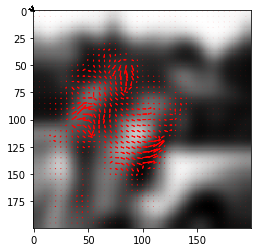

In [14]:
if __name__ == '__main__':
    #from argparse import ArgumentParser
    #p = ArgumentParser(description='Pure Python Horn Schunck Optical Flow')
    #p.add_argument('stem',help='path/stem of files to analyze')
    #p = p.parse_args()

    U, V = inputting_img()

    # plt.show()
    #success = plt.savefig('horn_shunck_ouput.png')
    # print(success)

## ACTUAL WILLIAM HARVEY CODE IMPLEMENTATION STARTS HERE:

In [ ]:
FILTER = 7
QUIVER = 5


def S():
    im1_path = str(
        "/home/saikrishna/Desktop/sem3/project/july/William_Harvey_Code/box0.bmp"
    )
    im2_path = str(
        "/home/saikrishna/Desktop/sem3/project/july/William_Harvey_Code/box1.bmp"
    )

    Iold = imread(im1_path, flatten=True).astype(float)
    Iold = gaussian_filter(Iold, FILTER)

    Inew = imread(im2_path, flatten=True).astype(float)
    Inew = gaussian_filter(Inew, FILTER)

    #cv_im1 = cv2.cvtColor(cv2.imread(im1_path),cv2.COLOR_RGB2GRAY)
    #cv_im2 = cv2.cvtColor(cv2.imread(im2_path),cv2.COLOR_RGB2GRAY)

    #u1, v1 = william_harvey_lk(cv_im1,cv_im2,1,100)
    fx, fy, fxx, fyy, ft = computeDerivatives(Iold, Inew)

    mat_fx = np.matrix(fx)
    mat_fy = np.matrix(fy)

    fx_sq = np.matmul(mat_fx, mat_fx)
    # print(fx_sq.shape)
    fy_sq = np.matmul(mat_fy, mat_fy)
    # print(fy_sq.shape)
    fx_fy = np.matmul(mat_fx, mat_fy)
    # print(fx_fy.shape)
    fy_fx = np.matmul(mat_fy, mat_fx)
    # print(fy_fx.shape)

    s_mat = np.bmat([[fx_sq, fx_fy], [fy_fx, fy_sq]])
    tensor_s = np.asarray(s_mat)
    # print(tensor_s.shape)
    # tensor_s shape is 400*400
    #tensor_s = np.matrix([[fx_sq, fx_fy], [fy_fx, fy_sq]])

    return tensor_s


tensor_s = S()
# print(tensor_s)

In [ ]:
def I(dim):
    return np.identity(dim, dtype=float)

In [ ]:
def sc():
    tou = 0.1
    alpha = 25
    # some scalar sc
    sc = tou/float(alpha)
    # print(sc)
    # 0.004
    return sc

In [10]:
def computeDerivatives(im1, im2):
    # %% build kernels for calculating derivatives
    kernelX = np.array([[-1, 1],
                        [-1, 1]]) * .25  # kernel for computing d/dx
    kernelY = np.array([[-1, -1],
                        [1, 1]]) * .25  # kernel for computing d/dy
    kernelT = np.ones((2, 2))*.25

    # im1 type: <class 'numpy.ndarray'>
    # im2 type: <class 'numpy.ndarray'>
#     print("im1 type:",type(im1),"im2 type:",type(im2))
    # convolving im1,im2 with kernelX and adding the result of both the conv operations

    #print(f'image1 shape : {im1.shape} , kernelX shape : {kernelX.shape}')
    fx = convolve(im1, kernelX) + convolve(im2, kernelX)

    # plot(fx)
    fy = convolve(im1, kernelY) + convolve(im2, kernelY)
    # plot(fy)
    #ft = im2 - im1
    ft = convolve(im1, kernelT) + convolve(im2, -kernelT)
    # plot(ft)

    #fx = single_derivative_x
    #fy = single_derivative_y

    # computing double derivatives for fx and fy:
    #scipy.ndimage.filters.convolve(input, weights, output=None, mode='reflect', cval=0.0, origin=0)

#     input : array_like
#     Input array to filter.

#     weights : array_like
#     Array of weights, same number of dimensions as input

#     print(fx.shape)
#     print(fy.shape)
#     print(kernelX.shape)
#     print(kernelY.shape)

    fxx = 0
    fyy = 0
    fxx = convolve(fx, kernelX)

    fyy = convolve(fy, kernelY)

    #fxx,fyy = computeDoubleDerivatives(fx,fy,kernelX,kernelY)
    # print("fx=",fx)
    # print("fx=",fy)
    # print("fx=",ft)
    return fx, fy, fxx, fyy, ft

In [ ]:
def c():

    im1_path = str(
        "/home/saikrishna/Desktop/sem3/project/july/William_Harvey_Code/box0.bmp")
    im2_path = str(
        "/home/saikrishna/Desktop/sem3/project/july/William_Harvey_Code/box1.bmp")

    Iold = imread(im1_path, flatten=True).astype(float)
    Iold = gaussian_filter(Iold, FILTER)
    # print(type(Iold))

    Inew = imread(im2_path, flatten=True).astype(float)
    Inew = gaussian_filter(Inew, FILTER)

    fx, fy, fxx, fyy, ft = computeDerivatives(Iold, Inew)

    # gradient of old image
    s_old = np.gradient(Iold)
    s_new = np.gradient(Inew)

    print(type(s_old), type(s_new))
    print(
        f' shape of gradient s[0] : {s_old[0].shape},shape of gradient s[1] : {s_old[1].shape}')
    print(
        f' shape of gradient s[0] : {s_new[0].shape},shape of gradient s[1] : {s_new[1].shape}')
    #(2, 200, 200),(2, 200, 200)

    # s = np.gradient(Inew)
    matrix_c_old = -(sc()*ft*s_old)
    matrix_c_new = -(sc()*ft*s_new)

    print(type(matrix_c_old))
    print(f'matrix_c_old shape :{matrix_c_old.shape}')

    print("SUCCESS! SWAMI'S GRACE!")
    return matrix_c_old
    # returns numpy array


c().shape
c()
#(2, 200, 200)
#print("SUCCESS! SWAMI'S GRACE!")

In [ ]:
def A():
    IA = I(400)

    temp = sc()*S()
    return np.add(IA, temp)
# print(A())

In [ ]:
# generating quiver plot:

"""
makes quiver
"""

def quiver_plot(U, V, Inew, scale=1):
    ax = plt.figure().gca()
    ax.imshow(Inew, cmap='gray')

    print("LENGTH OF U and V: ", len(U), len(V))
    # u and v length is 200,200.

    for i in range(0, len(U), QUIVER):
        for j in range(0, len(V), QUIVER):
            ax.arrow(j, i, v[i, j]*scale, u[i, j]*scale, color='yellow')
            ax.annotate("", xy=(0.5, 0.5), xytext=(0, 0),
                        arrowprops=dict(arrowstyle="->"))

    plt.savefig('william_harvey_code.pdf')

In [ ]:
def eqn(A, B, c):
    # this equation is to be solved

    print(A().shape)
    #(400,400)
    
    #print(B().shape)
    #print(c().shape)
    u = np.random.rand(200,200)
    print(type(u))
    
    v = np.random.rand(200,200)
    
#     np.random.randint(0,255)
    
    assert u.shape == v.shape, "something is wrong bro!\
                                check your code !\
                                  how are the dimensions of u and v different?"

    if not((A().shape == u.shape) and (B().shape == v.shape) and (c().shape == v.shape)):
        print("dims of matrices A,B,c are not equal!")

    else:
        mat_A = A.T
        mat_B = B.T
        for i in range(0, len(u), QUIVER):
            for j in range(0, len(v), QUIVER):

                u[i, j], v[i, j] = (
                    mat_A*(u[i, j], v[i, j]) - mat_B*(u[i, j], v[i, j])) + c()

        U = np.ndarray(u)
        V = np.ndarray(v)

    return U, V

U,V = eqn(A,B,c)
print(U,V)

In [2]:
from scipy.sparse import diags
import numpy as np

def D2(n):
    #n = 400
    k = np.array([np.ones(n-1), -2*np.ones(n), np.ones(n-1)])
    offset = [-1, 0, 1]
    D2 = diags(k, offset).toarray()

    return D2
# print(D2)

D2(2)

array([[-2.,  1.],
       [ 1., -2.]])

In [ ]:
tou = 0.1
def B(u, v):

    IB = I(400)
    tou = 0.1
    u = []
    v = []
    L = Mat_L(u, v)
    
    #print("tou t"type())
    
    mul = tou * 0
    
  #  print(type(mul[1][1]))

 #   print(mul[1][1])
    # type(mul[1][1]) : <class 'scipy.sparse.csr.csr_matrix'>

    mul_non_zero = []

#     for i in range(0, 200):
#         for j in range(0, 200):
#             for k in range(0, 200):

#                 # returns the nonzero index from mul array of sparse matrices :
#                 nonzero_index = mul[i][j][k].nonzero()

#     print(nonzero_index)

    # print(mul[1][1].nonzero())

    if type(IB) == type(mul):
        #print("type(IB) == type(mul)")
        if IB.shape == mul.shape:

            mat_B = np.add(IB, mul)
            return mat_B
    else:
        print("addition not possible")
        mat_B = []
    return mat_B

In [ ]:
%xmode Plain

In [ ]:
from scipy.sparse import identity, kronsum


def kron_product(A, B, C):

    MAT = np.kron(A, B)
    output = np.kron(MAT, C)
    return output


def kron_add(kp1,kp2,kp3):
    MAT = np.kronsum(kp1,kp2)
    output = np.kronsum(MAT,kp3)
    return output


def Mat_L(u, v):

    I3 = identity(3)
    L_D2 = D2(n=400)
    P = np.ndarray(u, v)
    P_Transpose = P.T
    I200 = identity(200)

    kp1 = []
    kp2 = []
    kp3 = []

    kp1 = kron_product(L_D2, I200, I200)
    kp2 = kron_product(I200, L_D2, I200)
    kp3 = kron_product(I200, I200, L_D2)
    
    kron_mat_add  = kp1 + kp2 + kp3

    return kron_mat_add

In [ ]:
def main2():
    im2_path = str(
        "/home/saikrishna/Desktop/sem3/project/july/William_Harvey_Code/box1.bmp")
    Inew = imread(im2_path, flatten=True).astype(float)
    Inew = gaussian_filter(Inew, FILTER)
    u = []
    v = []
    U_out, V_out = eqn(A(), B(u, v), c())

    quiver_plot(U_out, V_out, Inew, 1)
    
    

main2()